<a href="https://colab.research.google.com/github/AtriBh/GAN/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-g8ma3bmf
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-g8ma3bmf
  Resolved https://github.com/tensorflow/docs to commit 5ed8fbe64df2a05c6532919591219b545e61ef5f
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.1.11.719-py3-none-any.whl size=181231 sha256=c2cc99d38227b874f999a064869e0e74af4c8006de3a541eeac67cf1c1b21092
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ifeqiqj/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Certainly! It looks like you're working with TensorFlow and using its `tf.data.Dataset` API to create a dataset for training. Let's break down the functions used in the code snippet:

1. **tf.data.Dataset.from_tensor_slices(train_images):**
   - This function creates a dataset from a tensor or a list of tensors. In your case, `train_images` is likely a tensor containing your training data (images).
   - Each element of the dataset corresponds to a slice of the first dimension of `train_images`. So, if `train_images` is a 3D tensor of shape (num_samples, height, width), each element in the dataset would be a 2D tensor representing a single image.

2. **.shuffle(BUFFER_SIZE):**
   - This function shuffles the elements of the dataset to introduce randomness during training.
   - `BUFFER_SIZE` is the parameter that determines the size of the buffer used for shuffling. The dataset is initially filled with `BUFFER_SIZE` elements, and then elements are randomly chosen from this buffer.

3. **.batch(BATCH_SIZE):**
   - This function groups consecutive elements of the dataset into batches.
   - `BATCH_SIZE` is the parameter that specifies the number of elements in each batch. The resulting batches will have a shape determined by adding an extra dimension to the original data shape, where the size of that dimension is `BATCH_SIZE`.

In summary:
- `from_tensor_slices` creates a dataset from the input tensor(s).
- `shuffle` shuffles the elements to introduce randomness.
- `batch` groups consecutive elements into batches.

Putting it all together, your `train_dataset` is a shuffled and batched version of your training data, which is beneficial for training deep learning models as it introduces randomness and allows for more efficient processing in batches.

The `tf.keras.layers.Conv2DTranspose` layer in TensorFlow is used for upsampling or deconvolution in convolutional neural networks (CNNs). It is also known as a transposed convolution or fractionally strided convolution. This layer is often used in the context of generating high-resolution images from low-resolution ones, such as in image-to-image translation tasks or generative models like GANs (Generative Adversarial Networks).

Here's a brief explanation of what it does:

1. **Upsampling:**
   - The primary purpose of `Conv2DTranspose` is to perform upsampling, increasing the spatial dimensions of the input tensor.
   - While a standard convolutional layer (e.g., `Conv2D`) reduces the spatial dimensions of the input tensor, the transposed convolution does the opposite by expanding the spatial dimensions.

2. **Learnable Parameters:**
   - Like a regular convolutional layer, `Conv2DTranspose` has learnable parameters, including filters (kernels) and biases.
   - During training, these parameters are updated through backpropagation to learn features that are useful for the upsampling task.

3. **Output Shape:**
   - The output shape of the `Conv2DTranspose` layer is determined by the stride and padding settings, along with the input shape and filter size.
   - It allows you to control how much the spatial dimensions of the input tensor are increased.

Here's an example of how you might use `Conv2DTranspose` in a TensorFlow model:

```python
import tensorflow as tf

# Example usage in a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(16, 16, 3)),
    # Additional layers...
])
```

In this example, a transposed convolutional layer is used to upsample the input tensor by a factor of 2 in both height and width dimensions. The activation function 'relu' is applied element-wise to introduce non-linearity. The specific parameters like `strides`, `padding`, and `activation` can be adjusted based on the requirements of your model architecture.

In [ ]:
train_images.shape

NameError: name 'train_images' is not defined

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Certainly! Let's go through the `make_generator_model` function step by step and explain each function used:

```python
def make_generator_model():
    model = tf.keras.Sequential()
```

1. **`tf.keras.Sequential()`**:
   - This creates an empty sequential model, which is a linear stack of layers. Subsequent layers can be added to this model using the `add` method.

```python
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
```

2. **`layers.Dense(7*7*256, use_bias=False, input_shape=(100,))`**:
   - This adds a densely connected layer with 7*7*256 units. The `input_shape` parameter specifies the shape of the input data, which is a 1D array of size 100 in this case.
   - `use_bias=False` indicates that the layer won't use bias terms.
   - This dense layer is effectively mapping the 100-dimensional input noise vector to a higher-dimensional space (7*7*256).

```python
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
```

3. **`layers.BatchNormalization()`**:
   - Batch normalization normalizes the activations of the previous layer. It helps stabilize and accelerate the training process.

4. **`layers.LeakyReLU()`**:
   - Leaky ReLU (Rectified Linear Unit) is an activation function that allows a small, non-zero gradient when the input is negative. It helps address the vanishing gradient problem and can speed up training.

```python
    model.add(layers.Reshape((7, 7, 256)))
```

5. **`layers.Reshape((7, 7, 256))`**:
   - Reshapes the output of the previous layer into a 4D tensor with dimensions (7, 7, 256). This prepares the data for the convolutional transpose layers that follow.

```python
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
```

6. **`layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)`**:
   - This is a transposed convolutional layer with 128 filters, a kernel size of (5, 5), and a stride of (1, 1). The padding is set to 'same', and `use_bias=False` indicates that bias terms won't be used.

```python
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
```

7. **Additional BatchNormalization and LeakyReLU layers**:
   - Similar to the previous batch normalization and leaky ReLU layers, these are added for normalization and introducing non-linearity.

```python
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
```

8. **Another transposed convolutional layer**:
   - Similar to the previous transposed convolutional layer, but with 64 filters and a stride of (2, 2), resulting in an upsampling effect.

```python
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
```

9. **Additional BatchNormalization and LeakyReLU layers**:
   - Similar to before, these layers add normalization and non-linearity.

```python
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
```

10. **Final transposed convolutional layer with activation**:
   - This layer has 1 filter, a kernel size of (5, 5), a stride of (2, 2), and 'same' padding. The `tanh` activation function is used, which squashes the output values between -1 and 1.

```python
    return model
```

11. **Return the model**:
   - The function returns the constructed generator model.

In summary, this function defines a generator model for a Generative Adversarial Network (GAN). The generator takes a 100-dimensional noise vector as input and progressively upsamples it to produce a fake image with a shape of (28, 28, 1). The batch normalization and leaky ReLU activations help stabilize training and introduce non-linearity, and the final layer uses the tanh activation function to ensure the output is in the range [-1, 1].

build the gan upto to the point where the output shape becomes equal to the shape of the training image.

7,7,256 shape means 7 outer rows, and each rows contain an image of 7 rows and 256 cols

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
cross_entropy(tf.ones_like(generated_image),generated_image)

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
train(train_dataset, EPOCHS)

NameError: name 'train_dataset' is not defined

In [ ]:
# Setup connection aka iterator
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
ds=tfds.load('fashion_mnist',split="train")

dataiterator=ds.as_numpy_iterator()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteTQTW6M/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteTQTW6M/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
np.squeeze(dataiterator.next()["image"]).shape

(28, 28)

iterator .next() will give next images,which can help us create batch
tensorflow_datasets doesnt load the whole images into the memory ,it only stores the current instance and th next instance can be fetched by .next()

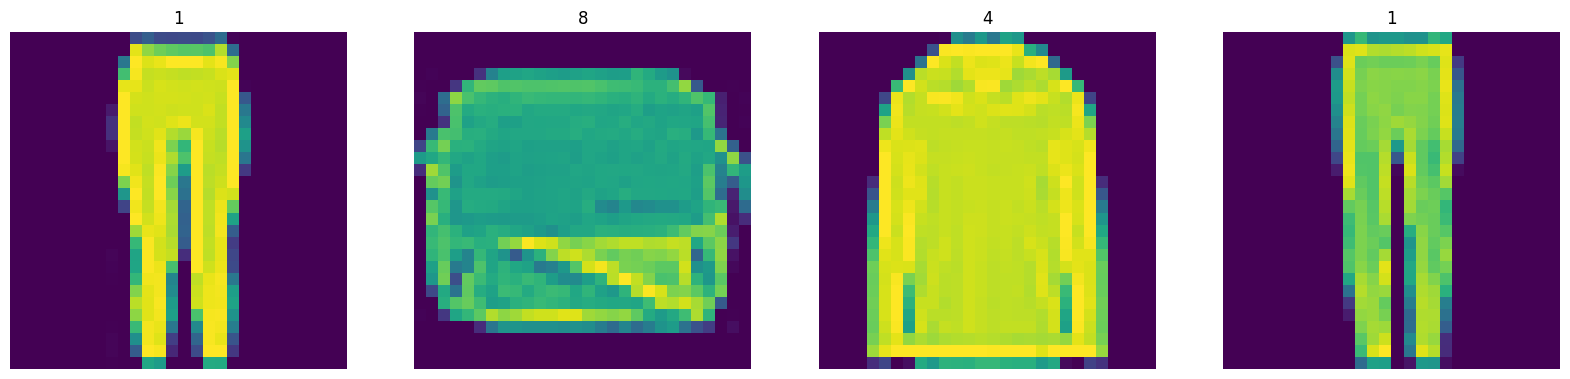

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
# loop four time to get image
for idx in range(4):
  # get sample of image
  img=dataiterator.next()
  #plot the image using specific subplot
  ax[idx].imshow(np.squeeze(img["image"]))
  ax[idx].set_title(img["label"])
  ax[idx].axis("off")


### Scaling

In [ ]:
def scale_images(data):
  image=data["image"]
  return image/255

The provided code loads the Fashion MNIST dataset using TensorFlow Datasets (`tfds`), applies a preprocessing step (`scale_images`), and performs various operations to prepare the dataset for training. Let's break down each step:

```python
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
```

1. **Load Dataset:**
   - Loads the Fashion MNIST dataset using TensorFlow Datasets. It loads the training split of the dataset.

```python
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
```

2. **Preprocessing:**
   - Applies the `scale_images` preprocessing function to the dataset. The specific details of the `scale_images` function are not provided, but it's assumed to scale the pixel values of the images to a certain range.

```python
# Cache the dataset for that batch
ds = ds.cache()
```

3. **Caching:**
   - Caches the dataset in memory. This can improve the training performance by avoiding redundant data loading from disk during training. It's beneficial when the dataset can fit in memory.

```python
# Shuffle it up
ds = ds.shuffle(60000)
```

4. **Shuffling:**
   - Shuffles the dataset with a buffer size of 60,000. This shuffling is done to introduce randomness during training, preventing the model from overfitting to a specific order of the data.

```python
# Batch into 128 images per sample
ds = ds.batch(128)
```

5. **Batching:**
   - Batches the dataset into batches of 128 images per sample. This is a common practice to train the model on smaller subsets of the data at a time, improving memory efficiency and allowing for parallel processing.

```python
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)
```

6. **Prefetching:**
   - Prefetches the next batch of data in the background while the model is training on the current batch. This helps to reduce the time spent waiting for data during training, improving overall training efficiency.

In summary, the code loads the Fashion MNIST dataset, applies a scaling preprocessing step, caches the dataset in memory, shuffles it, batches it into 128-image samples, and prefetches data to reduce potential bottlenecks during training. These steps are common practices for preparing a dataset for training machine learning models.


The `map` function in TensorFlow is used to apply a specified function to each element of a dataset. In the context of TensorFlow Datasets (`tfds`), the `map` function is commonly used to apply preprocessing transformations to each sample in a dataset. Here's how it generally works:

```python
dataset = dataset.map(preprocessing_function)
```

- **`dataset`**: The original dataset or a dataset pipeline.
- **`preprocessing_function`**: A function that defines the transformation to be applied to each element of the dataset.

For example, in the code snippet you provided:

```python
ds = ds.map(scale_images)
```

- `ds` is a TensorFlow dataset.
- `scale_images` is assumed to be a function that scales the pixel values of the images in the dataset.

The `map` function applies `scale_images` to each element of the dataset, effectively scaling the images in the dataset according to the defined transformation.

In the context of machine learning and deep learning, `map` is commonly used for various preprocessing tasks, such as scaling pixel values, resizing images, augmenting data, or any other operations that need to be applied to each sample in the dataset. It allows you to create a modified version of the original dataset by applying a function element-wise.

Note: The function passed to `map` should be a TensorFlow function, typically a function that takes a single argument (representing an element of the dataset) and returns the transformed version of that element.

In [ ]:
 # Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

no of image,h,w,channel

### Building the neural network

In [ ]:
#Build in the sequential api for generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,Flatten,LeakyReLU,Dropout,UpSampling2D

create image of size (7,7,128) where hight and width are (7,7) and no of images are 128

input shape is 128, which means it is taking in 128 images then pass it through dense layer to convert it into an image of 7,7,128 to give it spatial dimension

 `model=Sequential()
  model.add(Dense(7*7*128,input_dim=128)),
  model.add(LeakyReLU(0.2)),
  model.add(Reshape((7,7,128)))`

  our aim is to get image to
  shape (28,28,1)


  *** Upsampling *** Upsampling typically doubles the height and width of the image


Using only 1 upsampling block,we can see the width and height has been doubled

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_3 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
=================================================================
Total params: 1218816 (4.65 MB)
Trainable params: 1218816 (4.65 MB)
Non-trainable params: 0 (0.00 Byte)
______________________________________

* After umpsamping we add convd2d add parametrization,bccuz upsampling doesnt do
much when we look at information,but convd 2d will help increase or decrease the
quality of data by parametrizaton (kernels)

* 2 downsampling blocks are added so that we have more parameters to learn more about pixels and have better image generated

* After the last downsampling block,we have added another conv layer with 1 kernel which will generate the final image.
Basically 128 kernel produce 128 images with different feature highlighted

In [ ]:
def build_generator():
  model=Sequential()
  # Takes in random value and reshapes it to 7x7x128
  # Beginnings of generated image
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  #Upsampling block 1

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  #Upsampling block 2

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))


  #conv block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #conv block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #conv layers to get 1 channel
  model.add(Conv2D(1,4,padding="same",activation="sigmoid"))

  return model

In the context of images and convolutional neural networks (CNNs), the term "channels" refers to the different color information or feature maps present in an image. Channels are essentially the third dimension of an image tensor and represent different aspects or characteristics of the data.

For a grayscale image, there is only one channel, as the intensity of each pixel is represented by a single value. For color images, channels typically represent the intensity of different colors. The most common color representation is the RGB (Red, Green, Blue) model, where an image has three channels: one for red, one for green, and one for blue.

So, in the context of a 2D convolutional layer in a CNN, the number of channels in the input and output determines the depth or dimensionality of the feature map. Each channel represents a different aspect of the input data or captures specific features. For example, in the convolutional layer you provided:

```python
model.add(Conv2D(128, 4, padding='same'))
```

- `128` is the number of filters or channels in the output feature map.

If you have an input image with three channels (e.g., RGB), each of the 128 filters in the convolutional layer will produce a separate channel in the output. The resulting output feature map will have a depth of 128 channels.

These channels play a crucial role in capturing hierarchical features in images. In deeper layers of a CNN, channels often represent more complex and abstract features learned from the input data. The concept of channels is fundamental in understanding the representation of information in image data and the transformations applied by convolutional layers in neural networks.

When you have a feature map with 128 channels and you apply a `Conv2D` layer with 1 filter, each of the 128 channels in the input will be convolved with the single filter separately. The convolution operation is applied independently to each channel, and the results are summed to produce a single-channel output.

Here's how it works in more detail:

- Suppose you have an input feature map with shape `(batch_size, height, width, 128)`.
- You add a `Conv2D` layer with 1 filter: `model.add(Conv2D(1, kernel_size, padding='same'))`.

During the convolution operation:

- The 1 filter is applied independently to each of the 128 channels in the input.
- For each channel, the convolution operation produces a separate 2D output.
- The 2D outputs from all 128 channels are then summed element-wise to create a single-channel output.

So, the resulting output feature map will have shape `(batch_size, height, width, 1)`. The single channel represents the combined information from the 128 channels in the input.

This operation is sometimes used in neural networks for various reasons, such as reducing the dimensionality of the feature map, emphasizing certain patterns, or creating a summary representation of the input information. The key point is that each channel in the input contributes to the computation of the single-channel output through the convolution operation.

In [ ]:
generator=build_generator()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
# 4 random imae (no of image,random values number)
img=generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 2s 2s/step


In [ ]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 18ms/step


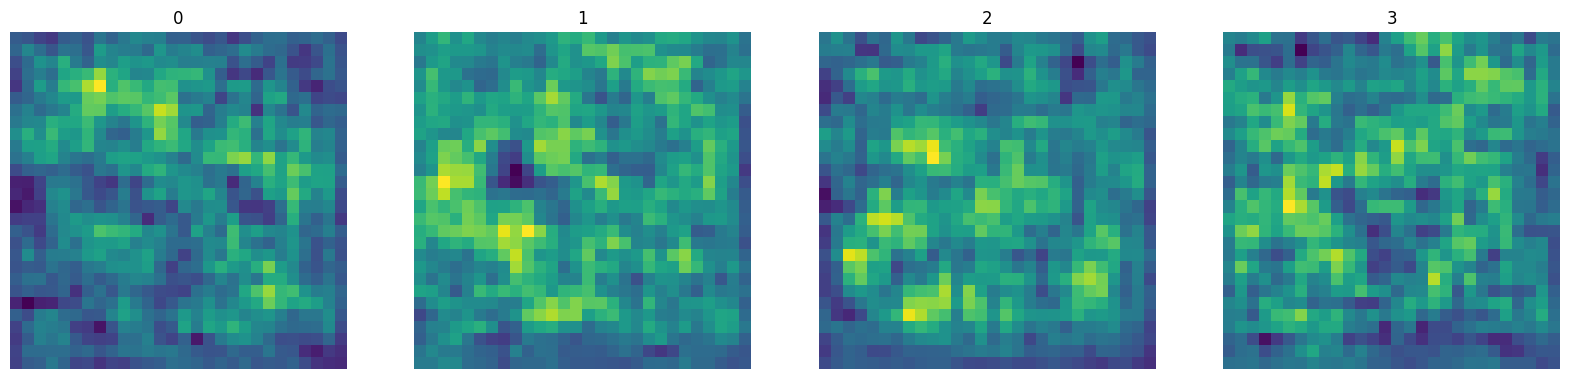

In [ ]:
img=generator.predict(np.random.randn(4,128,1))
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
# loop four time to get image
for idx,i in enumerate(img):

  #plot the image using specific subplot
  ax[idx].imshow(np.squeeze(i))
  ax[idx].set_title(idx)
  ax[idx].axis("off")


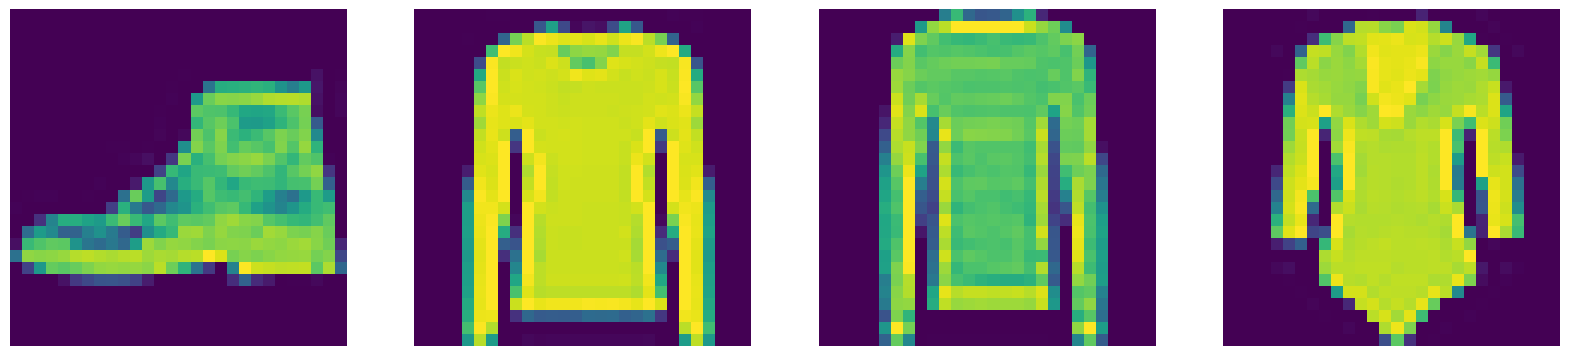

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for j in range(4):
  yimg=dataiterator.next()
  ax[j].imshow(np.squeeze(yimg['image']))
  ax[j].axis("off")

Padding is not used in build_discrimator because we want the size to decrease
and our ultimate goal is to classify whether the image is real or not

In [ ]:
def build_discriminator():
  model=Sequential()
  #First conv block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Second conv block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Third conv block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Fourth conv block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
discriminator=build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
img[0].shape

(28, 28, 1)

In [ ]:
np.expand_dims(img[0],axis=0).shape

(1, 28, 28, 1)

In [ ]:
discriminator.predict(np.expand_dims(img[0],axis=0))


1/1 [==============================] - 0s 265ms/step


array([[0.49894127]], dtype=float32)

In [ ]:
discriminator.predict(img)


1/1 [==============================] - 0s 267ms/step


array([[0.49894127],
       [0.4988544 ],
       [0.49877113],
       [0.49859774]], dtype=float32)

1:09:02

### Set up losses and optimizers

In [ ]:
#ADAM as optimizers for both
from tensorflow.keras.optimizers import Adam
#Binary cross entropy as loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
# Higher lr for g because we want the generator to learn faster so that it can trick
#the discriminator
g_opt = Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

### Building a subclassed model

In [ ]:
# Import the base model class to subclass our training step
from tensorflow.keras.models import Model

In Python, `args` and `kwargs` are used to handle variable numbers of arguments in function definitions. They allow you to create functions that can accept a varying number of positional and keyword arguments.

1. **`*args` (Arbitrary Positional Arguments):**
   - The `*args` syntax in a function definition allows you to pass a variable number of positional arguments to the function.
   - The `*` before `args` allows the function to accept any number of positional arguments, and it collects them into a tuple.

   ```python
   def example_function(*args):
       for arg in args:
           print(arg)

   example_function(1, 2, 3, "four")
   ```

   Output:
   ```
   1
   2
   3
   four
   ```

2. **`**kwargs` (Arbitrary Keyword Arguments):**
   - The `**kwargs` syntax allows a function to accept a variable number of keyword arguments.
   - The `**` before `kwargs` allows the function to collect any additional keyword arguments not explicitly defined in the function signature into a dictionary.

   ```python
   def example_function(**kwargs):
       for key, value in kwargs.items():
           print(key, ":", value)

   example_function(name="John", age=25, city="New York")
   ```

   Output:
   ```
   name : John
   age : 25
   city : New York
   ```

Using both `*args` and `**kwargs` in a function allows it to accept any combination of positional and keyword arguments:

```python
def example_function(*args, **kwargs):
    for arg in args:
        print(arg)
    
    for key, value in kwargs.items():
        print(key, ":", value)

example_function(1, 2, 3, name="John", age=25)
```

Output:
```
1
2
3
name : John
age : 25
```

In this example, `*args` collects positional arguments into a tuple, and `**kwargs` collects keyword arguments into a dictionary.


The `super().__init__(*args, **kwargs)` statement is commonly used in Python within a subclass constructor to call the constructor of its superclass (parent class). Specifically, it calls the `__init__` method of the superclass and passes any arguments and keyword arguments received by the subclass constructor (`*args` and `**kwargs`).

Here's a breakdown of what each part does:

- **`super()`**: It returns a temporary object of the superclass, which allows you to call its methods. In the context of `super().__init__()`, it is used to call the `__init__` method of the superclass.

- **`__init__`**: This is the constructor method of a class, where you typically initialize the object's attributes.

- **`*args, **kwargs`**: These are used to pass a variable number of arguments and keyword arguments to the constructor. The `*args` collects positional arguments into a tuple, and `**kwargs` collects keyword arguments into a dictionary.

Putting it all together, `super().__init__(*args, **kwargs)` is a way to invoke the constructor of the superclass, passing along any arguments and keyword arguments that the subclass constructor received. This is important because it allows the subclass to perform its own initialization while also ensuring that the initialization of the superclass is properly executed.

Here's a simple example to illustrate:

```python
class Parent:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Child(Parent):
    def __init__(self, z, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.z = z

# Creating an instance of the Child class
child_obj = Child(z=10, x=1, y=2)

print(child_obj.x)  # Output: 1 (inherited from Parent)
print(child_obj.y)  # Output: 2 (inherited from Parent)
print(child_obj.z)  # Output: 10 (specific to Child)
```

In this example, `super().__init__(*args, **kwargs)` in the `Child` class ensures that the `__init__` method of the `Parent` class is called with the appropriate arguments, allowing both the parent and child classes to perform their respective initializations.


batch of data is
ds.as_nupy_iertaor().next()


In [ ]:
import tensorflow as tf

tf.random.normal((4,4,1))

<tf.Tensor: shape=(4, 4, 1), dtype=float32, numpy=
array([[[ 1.7288991 ],
        [-0.87364453],
        [ 1.2075455 ],
        [ 0.9248858 ]],

       [[-0.6885633 ],
        [-0.49461672],
        [-0.63396525],
        [ 1.5831399 ]],

       [[ 0.04682695],
        [ 0.43934894],
        [ 1.1405536 ],
        [ 1.5327344 ]],

       [[ 0.18160076],
        [-1.7192584 ],
        [-0.77744853],
        [-0.10628222]]], dtype=float32)>

In [ ]:
tf.concat([tf.zeros_like(tf.random.normal((6,128))),tf.ones_like(tf.random.normal((6,128)))],axis=0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

true nosie and fake nouise are added to yhat_realfake to add noise so that discrimiantor doesnt learn too fast such that generator
cant create images which can fool the disriminator

Certainly! The code you provided seems to be part of a training step for a Generative Adversarial Network (GAN). I'll break down the code and explain each part in detail:

```python
def train_step(self, batch):
    # Get the data
    real_images = batch

    # Generate 128 images of size 128 rows and 1 column
    # Training=False, as we are not training the generator here, only making predictions
    fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:
        # Pass the real and fake images to the discriminator model, training=True to activate dropout layer
        yhat_real = self.discriminator(real_images, training=True)
        yhat_fake = self.discriminator(fake_images, training=True)

        # Concatenate the real and fake outputs along axis 0
        yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

        # Create labels for real (0) and fake images (1)
        y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

        # Add some noise to the true output to prevent it from learning too fast
        noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
        noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
        y_realfake += tf.concat([noise_real, noise_fake], axis=0)

        # Calculate loss using Binary Cross Entropy
        total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    # Apply backpropagation
    # Calculate the gradient by using loss with respect to trainable variables
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)

    # Apply backpropagation by applying the gradients to the discriminator's trainable variables
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
```

Now, let's break down the steps:

1. **Data Retrieval:**
   - `real_images` are real samples from the training dataset.
   - `fake_images` are generated by passing random noise to the generator. The generator is not trained in this step (`training=False`).

2. **Discriminator Training:**
   - The code uses a `tf.GradientTape` to record operations for automatic differentiation, specifically for training the discriminator.
   - The real and fake images are passed through the discriminator, and the outputs are obtained (`yhat_real` and `yhat_fake`).
   - The outputs are concatenated along axis 0 to form `yhat_realfake`, which represents the discriminator's predictions on both real and fake images.
   - Labels (`y_realfake`) are created for real images (0) and fake images (1).
   - Some noise is added to the true outputs to introduce randomness and prevent the discriminator from learning too fast.

3. **Loss Calculation:**
   - Binary Cross Entropy is used to calculate the loss (`total_d_loss`) between the predicted outputs (`yhat_realfake`) and the target labels (`y_realfake`).

4. **Backpropagation:**
   - The gradients of the loss with respect to the trainable variables of the discriminator are calculated using `d_tape.gradient`.
   - The optimizer (`self.d_opt`) is then used to apply these gradients and update the discriminator's trainable variables.

This process helps train the discriminator to better distinguish between real and fake samples. The generator will subsequently be trained to generate more realistic samples that can fool the discriminator. This adversarial training loop continues iteratively.`

In the provided code, `self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))` is applying the gradients calculated during backpropagation to the trainable variables of the discriminator using the specified optimizer (`self.d_opt`). Let's break down this line:

```python
self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
```

- `self.d_opt`: This likely refers to an instance of a TensorFlow optimizer that has been previously defined. Common optimizers include Stochastic Gradient Descent (SGD), Adam, RMSprop, etc. The choice of optimizer depends on the specific requirements of the training task.

- `dgrad`: This is a list of gradients calculated with respect to the trainable variables of the discriminator. Each element in `dgrad` corresponds to the gradient of the total loss with respect to a particular trainable variable.

- `self.discriminator.trainable_variables`: This is a list of all the trainable variables of the discriminator model. These are the parameters (weights and biases) that the optimizer will update during training.

- `zip(dgrad, self.discriminator.trainable_variables)`: This creates pairs of gradients and corresponding trainable variables. Each pair represents the gradient of the loss with respect to a specific trainable variable.

- `apply_gradients`: This method of the optimizer applies the gradients to the corresponding trainable variables. It updates the model's parameters in the direction that reduces the loss.

So, the overall effect of this line is to perform a step of optimization on the discriminator model. The optimizer uses the computed gradients to adjust the trainable variables, effectively updating the discriminator's parameters to minimize the loss with respect to those variables. This process is a key step in the training loop of neural networks, where the model learns to improve its performance over time by adjusting its parameters based on the observed loss.

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    # Pass through args and kawrgs to base class
    super().__init__(*args,**kwargs)
    #Create attributes for gen and disc
    self.generator = generator
    self.discriminator = discriminator
  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    #Compile with base class
    super().compile(*args,**kwargs)
    # Create attributes for loss and optimizers
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss
  def train_step(self,batch):
    # Get the data
    real_images= batch
    #generate 128 images of size 128 rows and 1 col
    #training = false ,as we are not training instead making predictions
    fake_images = self.generator(tf.random.normal((128,128,1)),training=False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to d model,training - true to activate dropoutlayer

      yhat_real= self.discriminator(real_images, training=True)
      yhat_fake= self.discriminator(fake_images, training=True)
      yhat_realfake= tf.concat([yhat_real,yhat_fake],axis=0)

      # Create labels for real (0) and fake images (1)

      y_realfake= tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
      # Add some noise to true o/p to prevent it from learning too fast

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake +=tf.concat([noise_real,noise_fake],axis=0)

      # calculate loss - Binary Cross Entropy

      total_d_loss=self.d_loss(y_realfake,yhat_realfake)

    # apply backpropagation -nn learn
    # calculating the gradient by using loss wrt trainable variables so we extract them

    dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)

    # Apply backprop,it is going to look at the gradient for each of training variables and apply backprop

    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
      # Generate some new images
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)
      # Create the predicted labels
      # We dont want the discriminator to be learning as we train our generator
      #so training=False
      predicted_labels = self.discriminator(gen_images,training=False)
      # Calculate Loss
      # In order to confuse our generator , we are comparing wrt to real images with size of
      # predicted so the generator will think that image is real but discriminator is giving fake
      # it will try to minimise the distance b/w real and fake
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
    # Apply backprop

    ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss": total_d_loss,
            "g_loss": total_g_loss}

In [ ]:
# Create instance of subclass model

fashgan = FashionGAN(generator,discriminator)

In [ ]:
# Compile the model

fashgan.compile(g_opt,d_opt,g_loss,d_loss)

### Build Callback



optional

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

### Training

In [ ]:
hist = fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 1:11 - d_loss: 7.7345 - g_loss: 0.0000e+00

469/469 [==============================] - 76s 161ms/step - d_loss: 1.2229 - g_loss: 0.7501
Epoch 2/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.6652 - g_loss: 0.6894
Epoch 3/20
469/469 [==============================] - 78s 165ms/step - d_loss: 0.4921 - g_loss: 0.2351
Epoch 4/20
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2845 - g_loss: 0.1142
Epoch 5/20
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2769 - g_loss: 0.2055
Epoch 6/20
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2741 - g_loss: 0.2692
Epoch 7/20
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2725 - g_loss: 0.3436
Epoch 8/20
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2719 - g_loss: 0.4300
Epoch 9/20
469/469 [==============================] - 76s 162ms/step - d_loss: 0.2710 - g_loss: 0.5023
Epoch 10/20
469/469 [==============================] - 78s 165ms/step - d_loss: 0.32

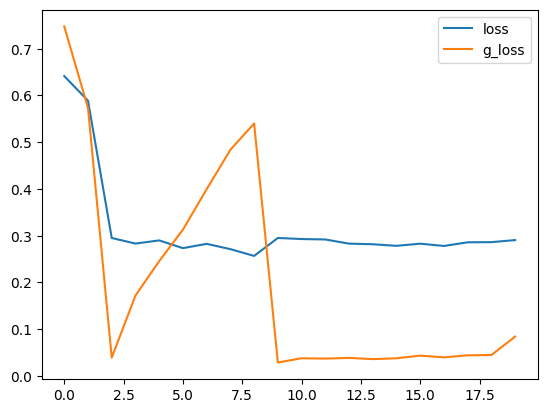

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["d_loss"],label="loss")
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

### Generate Images

In [ ]:
imgs= generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 473ms/step


In [ ]:
imgs

array([[[[1.0000000e+00],
         [1.0000000e+00],
         [0.0000000e+00],
         ...,
         [1.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[1.0000000e+00],
         [1.0000000e+00],
         [0.0000000e+00],
         ...,
         [1.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[1.0000000e+00],
         [1.0000000e+00],
         [0.0000000e+00],
         ...,
         [1.0000000e+00],
         [3.0426655e-26],
         [0.0000000e+00]],

        ...,

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [1.0000000e+00],
         [1.0000000e+00],
         [0.0000000e+00]],

        [[1.1135146e-37],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [1.0000000e+00],
         [1.0000000e+00],
         [1.3736533e-16]],

        [[2.0386404e-05],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [1.0000000e+00],
        

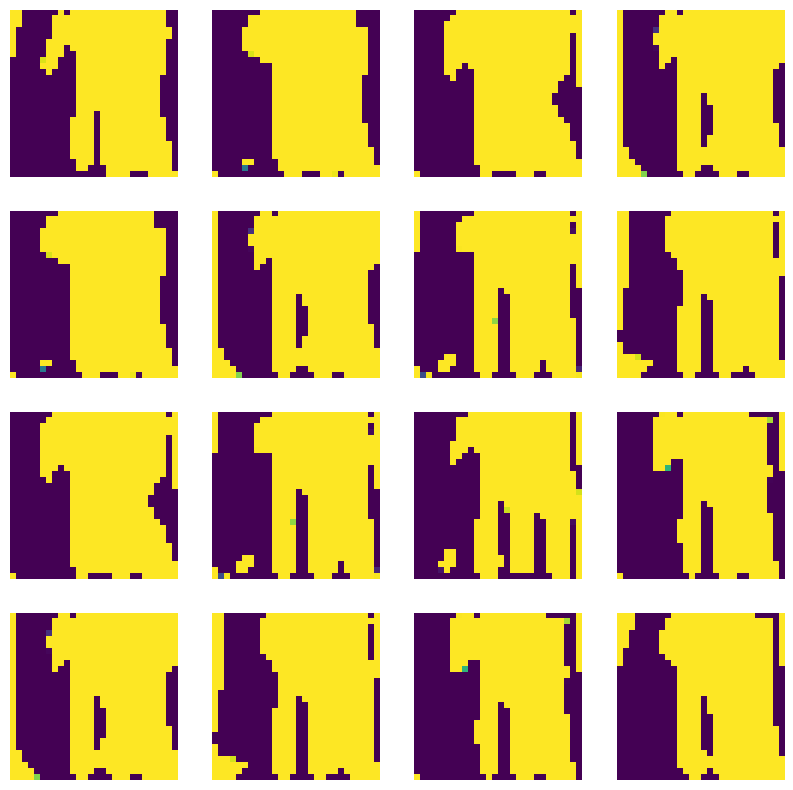

In [ ]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i in range(4):
  for j in range(4):
    ax[i][j].imshow(imgs[(i+1)*(j+1)-1])
    ax[i][j].axis('off')

### GAN applied to mnist dataset

In [ ]:
# Load data
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
mnist=tfds.load("mnist",split="train")

In [ ]:
img=mnist.as_numpy_iterator().next()

In [ ]:
img['image'].max()

255

In [ ]:
img['image'].shape

(28, 28, 1)

### Visualise mnist

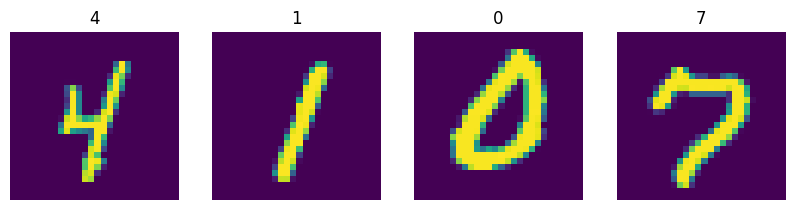

In [ ]:
import matplotlib.pyplot as plt
mnist_iter=mnist.as_numpy_iterator()
fig,ax=plt.subplots(ncols=4,figsize=(10,10))
for i in range(4):
  img=mnist_iter.next()
  ax[i].imshow(np.squeeze(img['image']))
  ax[i].set_title(img['label'])
  ax[i].axis("off")

In [ ]:
def scale(img):
  return img['image']/255

In [ ]:
# Scale
mnist=mnist.map(scale)
# Cache
mnist=mnist.cache()
# Shuffle
mnist=mnist.shuffle(60000)
# Batch
mnist=mnist.batch(128)
# Prefetch
mnist=mnist.prefetch(64)

### Creating Generator Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,LeakyReLU,Dropout,Dense,Reshape,Flatten,UpSampling2D

In [ ]:
def generator():
  model = Sequential()
  # Create Image

  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # Upsampling Block 1

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # Upsampling Block 2

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv Block 1

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv Block 2

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv OUTPUT
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model


In [ ]:
test=generator()
test.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_235 (LeakyReLU  (None, 6272)              0         
 )                                                               
                                                                 
 reshape_26 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_52 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_234 (Conv2D)         (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_236 (LeakyReLU  (None, 14, 14, 128)     

1/1 [==============================] - 0s 94ms/step


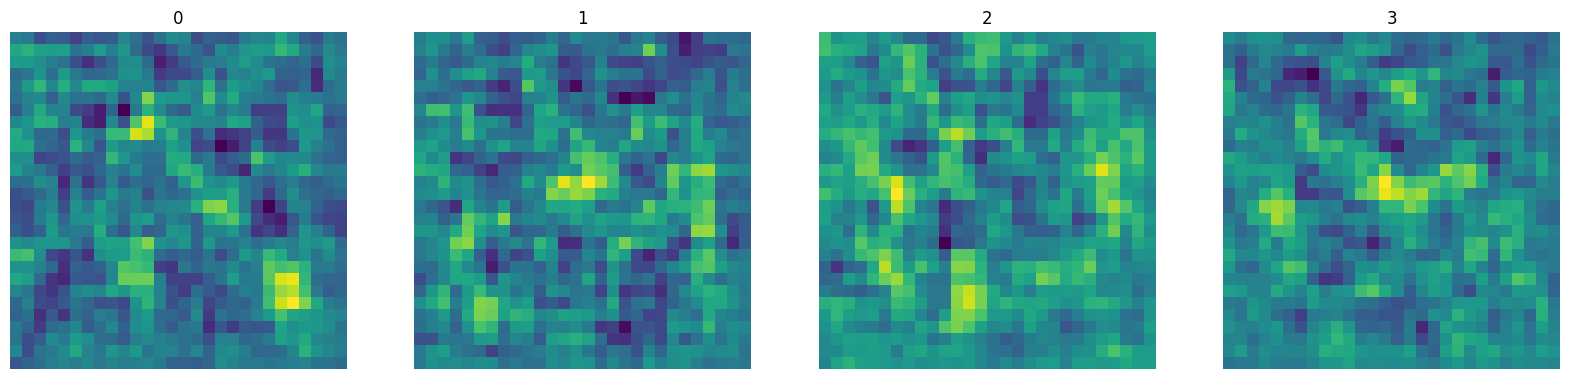

In [ ]:
img=test.predict(np.random.randn(4,128,1))
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
# loop four time to get image
for idx,i in enumerate(img):

  #plot the image using specific subplot
  ax[idx].imshow(np.squeeze(i))
  ax[idx].set_title(idx)
  ax[idx].axis("off")

### Discriminator

In [ ]:
def discriminator():
  model= Sequential()
  # Conv Block 1
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  # Conv Block 2
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  # Conv Block 3
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  # Conv Block 4
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  # Dense Layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation="sigmoid"))

  return model

In [ ]:
test_2=discriminator()

In [ ]:
test_2.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_239 (Conv2D)         (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_240 (LeakyReLU  (None, 24, 24, 32)        0         
 )                                                               
                                                                 
 dropout_128 (Dropout)       (None, 24, 24, 32)        0         
                                                                 
 conv2d_240 (Conv2D)         (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_241 (LeakyReLU  (None, 20, 20, 64)        0         
 )                                                               
                                                                 
 dropout_129 (Dropout)       (None, 20, 20, 64)      

In [ ]:
test_2.predict(np.expand_dims(img[0],axis=0))

1/1 [==============================] - 0s 268ms/step


array([[0.50478333]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
#ADAM as optimizers for both
from tensorflow.keras.optimizers import Adam
#Binary cross entropy as loss for both
from tensorflow.keras.losses import BinaryCrossentropy
# Higher lr for g because we want the generator to learn faster so that it can trick
#the discriminator
g_opt = Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

def call(self, inputs, training=None, mask=None):
        # Generate fake images using the generator
        fake_images = self.generator(inputs, training=training)

        # Pass fake images through the discriminator
        discriminator_output = self.discriminator(fake_images, training=training)
        return discriminator_output

class mnistgan(Model):
  def __init__(self,discriminator,generator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.discriminator=discriminator
    self.generator=generator
  def compile(self,d_opt,g_opt,d_loss,g_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.d_opt=d_opt
    self.g_opt=g_opt
    self.d_loss=d_loss
    self.g_loss=g_loss
  def call(self, inputs, training=None, mask=None):
        # Generate fake images using the generator
        fake_images = self.generator(inputs, training=training)

        # Pass fake images through the discriminator
        discriminator_output = self.discriminator(fake_images, training=training)
        return discriminator_output
  def train(self,batch):
    
    real_images=batch
    fake_images=self.generator(tf.random.normal(128,128,1),training=False)
    # Training Discriminator
    with tf.GradientTape() as d_tape:
      yhat_real= self.discriminator(real_images,training=True)
      yhat_fake= self.discriminator(fake_images,training=True)
      yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)
      y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
      # noise
      noise_real=0.15*(tf.random.uniform(tf.shape(yhat_real)))
      noise_fake=-0.15*(tf.random.uniform(tf.shape(yhat_fake)))
      y_realfake+=tf.concat([noise_real,noise_fake],axis=0)
      # loss
      d_total_loss=self.d_loss(y_realfake,yhat_realfake)
    d_grad=d_tape.gradient(d_total_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(d_grad,self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      fake_img=self.generator(tf.random.normal((128,128,1)),training=True)
      y_fake_img=self.discriminator(fake_img,training=False)
      #g_loss
      g_total_loss=self.g_loss(tf.zeros_like(y_fake_img),y_fake_img)

    g_grad=g_tape.gradient(g_total_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_grad,self.generator.trainable_variables))

    return {'d_loss' : d_total_loss,
            'g_loss' : g_total_loss}

class MnistGAN(Model):
    def __init__(self, discriminator, generator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_opt, g_opt, d_loss, g_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.d_opt = d_opt
        self.g_opt = g_opt
        self.d_loss = d_loss
        self.g_loss = g_loss

    def train_step(self, batch):
        real_images = batch
        fake_images = self.generator.predict(tf.random.normal((128,128,1)), training=False)
        # Training Discriminator
        with tf.GradientTape() as d_tape:
            
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)

            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Noise
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Loss
            d_total_loss = self.d_loss(y_realfake, yhat_realfake)

        d_grad = d_tape.gradient(d_total_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))

        # Training Generator
        with tf.GradientTape() as g_tape:
            fake_images = self.generator(tf.random.normal(tf.shape(real_images)), training=True)
            y_fake_img = self.discriminator(fake_images, training=False)

            # Generator loss
            g_total_loss = self.g_loss(tf.zeros_like(y_fake_img), y_fake_img)

        g_grad = g_tape.gradient(g_total_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(g_grad, self.generator.trainable_variables))

        return {'d_loss': d_total_loss, 'g_loss': g_total_loss}

# Instantiate the model and compile it
mnist_gan = MnistGAN(discriminator, generator)
mnist_gan.compile(d_opt, g_opt, d_loss, g_loss)

# Assuming mnist is your dataset
mnist_gan.fit(mnist, epochs=30)


In [ ]:
class mnistgan(Model):
  def __init__(self,discriminator,generator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.discriminator=discriminator
    self.generator=generator
  def compile(self,d_opt,g_opt,d_loss,g_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.d_opt=d_opt
    self.g_opt=g_opt
    self.d_loss=d_loss
    self.g_loss=g_loss

  def train(self,batch):

    real_images=batch
    fake_images=self.generator(tf.random.normal(128,128,1),training=False)
    # Training Discriminator
    with tf.GradientTape() as d_tape:
      yhat_real= self.discriminator(real_images,training=True)
      yhat_fake= self.discriminator(fake_images,training=True)
      yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)
      y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
      # noise
      noise_real=0.15*(tf.random.uniform(tf.shape(yhat_real)))
      noise_fake=-0.15*(tf.random.uniform(tf.shape(yhat_fake)))
      y_realfake+=tf.concat([noise_real,noise_fake],axis=0)
      # loss
      d_total_loss=self.d_loss(y_realfake,yhat_realfake)
    d_grad=d_tape.gradient(d_total_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(d_grad,self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      fake_img=self.generator(tf.random.normal((128,128,1)),training=True)
      y_fake_img=self.discriminator(fake_img,training=False)
      #g_loss
      g_total_loss=self.g_loss(tf.zeros_like(y_fake_img),y_fake_img)

    g_grad=g_tape.gradient(g_total_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_grad,self.generator.trainable_variables))

    return {'d_loss' : d_total_loss,
            'g_loss' : g_total_loss}

In [ ]:
generator=generator()
discriminator=discriminator()
mnist_gan=mnistgan(discriminator,generator)

In [ ]:
mnist_gan.compile(d_opt,g_opt,d_loss,g_loss)

In [ ]:
hist=mnist_gan.fit(mnist,epochs=30)

Epoch 1/30


NotImplementedError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 617, in call
        raise NotImplementedError(

    NotImplementedError: Exception encountered when calling layer 'mnistgan_14' (type mnistgan).
    
    Unimplemented `tf.keras.Model.call()`: if you intend to create a `Model` with the Functional API, please provide `inputs` and `outputs` arguments. Otherwise, subclass `Model` with an overridden `call()` method.
    
    Call arguments received by layer 'mnistgan_14' (type mnistgan):
      • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
def build_generator():
  model=Sequential()
  # Takes in random value and reshapes it to 7x7x128
  # Beginnings of generated image
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  #Upsampling block 1

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  #Upsampling block 2

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))


  #conv block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #conv block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #conv layers to get 1 channel
  model.add(Conv2D(1,4,padding="same",activation="sigmoid"))

  return model

In [ ]:
def build_discriminator():
  model=Sequential()
  #First conv block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Second conv block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Third conv block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Fourth conv block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    # Pass through args and kawrgs to base class
    super().__init__(*args,**kwargs)
    #Create attributes for gen and disc
    self.generator = generator
    self.discriminator = discriminator
  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    #Compile with base class
    super().compile(*args,**kwargs)
    # Create attributes for loss and optimizers
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss
  def train_step(self,batch):
    # Get the data
    real_images= batch
    #generate 128 images of size 128 rows and 1 col
    #training = false ,as we are not training instead making predictions
    fake_images = self.generator(tf.random.normal((128,128,1)),training=False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to d model,training - true to activate dropoutlayer

      yhat_real= self.discriminator(real_images, training=True)
      yhat_fake= self.discriminator(fake_images, training=True)
      yhat_realfake= tf.concat([yhat_real,yhat_fake],axis=0)

      # Create labels for real (0) and fake images (1)

      y_realfake= tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
      # Add some noise to true o/p to prevent it from learning too fast

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake +=tf.concat([noise_real,noise_fake],axis=0)

      # calculate loss - Binary Cross Entropy

      total_d_loss=self.d_loss(y_realfake,yhat_realfake)

    # apply backpropagation -nn learn
    # calculating the gradient by using loss wrt trainable variables so we extract them

    dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)

    # Apply backprop,it is going to look at the gradient for each of training variables and apply backprop

    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
      # Generate some new images
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)
      # Create the predicted labels
      # We dont want the discriminator to be learning as we train our generator
      #so training=False
      predicted_labels = self.discriminator(gen_images,training=False)
      # Calculate Loss
      # In order to confuse our generator , we are comparing wrt to real images with size of
      # predicted so the generator will think that image is real but discriminator is giving fake
      # it will try to minimise the distance b/w real and fake
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
    # Apply backprop

    ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss": total_d_loss,
            "g_loss": total_g_loss}

generator=build_generator()
discriminator=build_discriminator()
mnist_gan=mnistgan(generator,discriminator)
mnist_gan.compile(g_opt,d_opt,g_loss,d_loss)
mnist_gan.fit(mnist,epochs=30)

there seems to be a problem with ur self written code,tommrow make a new notebook and debug from scratch